#### This Project is made by L Rohan

**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Motivation**: To create a multiclass classification model using a custom convolutional neural network in tensorflow

**Data Summary:**

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:
1. Actinic keratosis
2. Basal cell carcinoma
3. Dermatofibroma
4. Melanoma
5. Nevus
6. Pigmented benign keratosis
7. Seborrheic keratosis
8. Squamous cell carcinoma
9. Vascular lesion
 

### Importing Skin Cancer Data

### Importing all the important libraries

In [1]:
import tensorflow as tf
print(tf.__version__)


2.16.2


In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical  # Correct import path
import Augmentor


## Implementing the code in local machine & not in Colab

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/Users/rohannaidu/Desktop/Melanoma_Assignment'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


2024-11-19 17:53:04.085650: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-11-19 17:53:04.085685: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-19 17:53:04.085694: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-19 17:53:04.086011: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-19 17:53:04.086024: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [8]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

2024-11-19 17:53:04.681462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


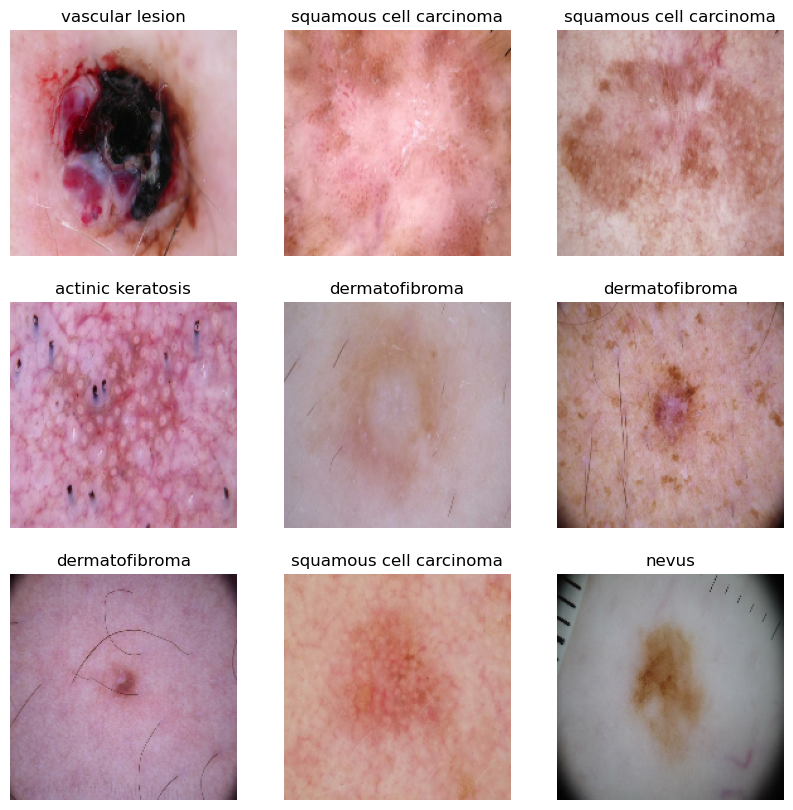

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 1st Model: Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
preprocessing_layers = [
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3))
]

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
### Your code goes here

input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

model_1 = Sequential()
model_1.add(tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)))
model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_1.add(MaxPool2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D(pool_size=(2, 2)))

model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D(pool_size=(2, 2)))

model_1.add(Flatten())

model_1.add(Dense(512, activation='relu'))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1))
model_1.add(Activation('sigmoid'))

## Number of classes is 9
model_1.summary()

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 176, 176, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 88, 88, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 86, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 86, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,318,689 (100.40 MB)

 Trainable params: 26,318,305 (100.40 MB)

 Non-trainable params: 384 (1.50 KB)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function

optimizer = 'adam'
loss_fn = "binary_crossentropy"
model_1.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 176, 176, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 88, 88, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 86, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 86, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,318,689 (100.40 MB)

 Trainable params: 26,318,305 (100.40 MB)

 Non-trainable params: 384 (1.50 KB)

### Train the model

In [16]:
epochs = 20
batch_size = 32

history = model_1.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2024-11-19 17:53:06.035268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


281/281 ━━━━━━━━━━━━━━━━━━━━ 40s 120ms/step - accuracy: 0.1278 - loss: -1464560.1250 - val_accuracy: 0.1291 - val_loss: -14272894.0000
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 34s 120ms/step - accuracy: 0.1201 - loss: -43826324.0000 - val_accuracy: 0.1291 - val_loss: -69440816.0000
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 34s 120ms/step - accuracy: 0.1227 - loss: -219723024.0000 - val_accuracy: 0.1291 - val_loss: -550384064.0000
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 34s 120ms/step - accuracy: 0.1174 - loss: -613402624.0000 - val_accuracy: 0.1291 - val_loss: -865516096.0000
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 34s 120ms/step - accuracy: 0.1222 - loss: -1285385472.0000 - val_accuracy: 0.1291 - val_loss: -1798945536.0000
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 34s 121ms/step - accuracy: 0.1197 - loss: -2262664448.0000 - val_accuracy: 0.1291 - val_loss: -3484722176.0000
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 34s 120ms/step - accuracy: 0.1256 - loss: -3509439488.0000 - val_accuracy: 0.1

### Visualizing training results

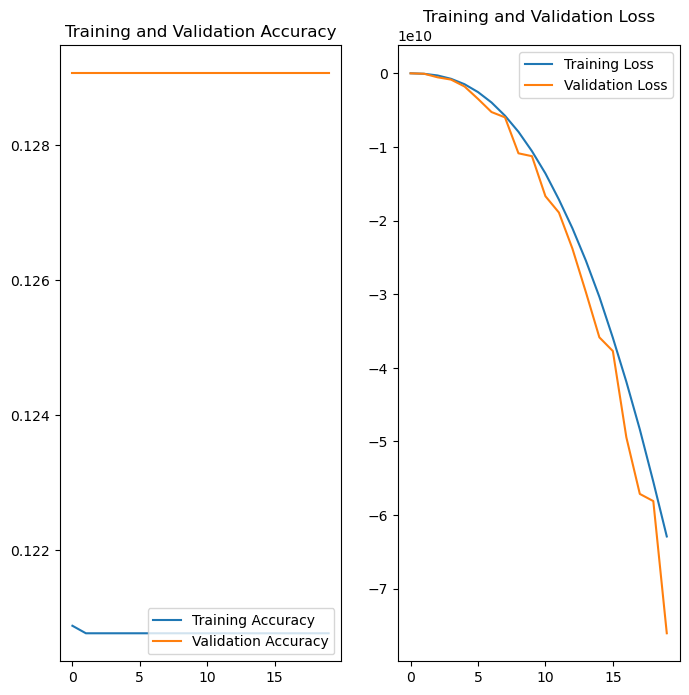

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model Overfit or Underfit?

In [18]:

loss, accuracy = model_1.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model_1.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


# Thus we can clearly that model Overfit and we need to chose right data augumentation strategy

281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.1181 - loss: -74604822528.0000
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1313 - loss: -77620568064.0000
Accuracy:  0.12077402323484421
Validation Accuracy:  0.12906096875667572
Loss:  -75228758016.0
Validation Loss -76055937024.0


In [19]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

image_class = ['nevus','melanoma','basal_cell_caricoma','actinic_keratosis','vasc_lesion','dermatofibroma', 'pigmented_keratosis', 'seborrheic_keratosis', 'squamous_carci']

train_batches = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
 )

valid_batches = datagen.flow_from_directory(data_dir_test, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
)


Found 3890 images belonging to 9 classes.
Found 48 images belonging to 9 classes.


2024-11-19 18:04:38.393101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


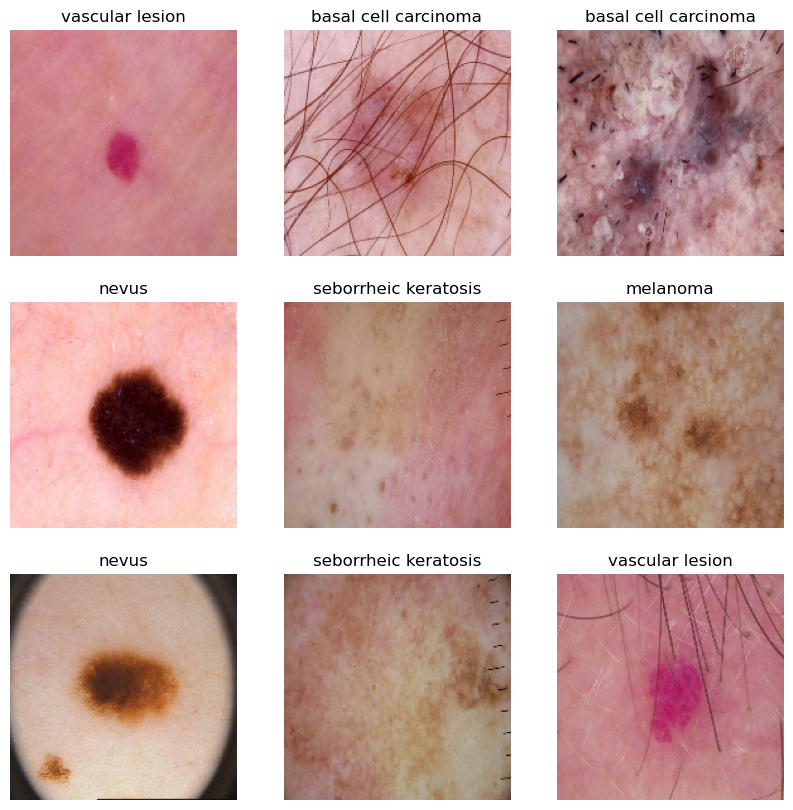

In [20]:
# visualize how your augmentation strategy works for one instance of training image.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


### 2nd Model: Create the model, compile and train the model


In [21]:
# Model architecture (as you have provided)
input_shape = (180, 180, 3)
lr = 1e-5  # learning rate

model = Sequential()

# Convolutional and Pooling layers with dropout
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten and Dense layers with Dropout
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))  # 9 classes for multi-class classification

# Model Summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 180, 180, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 43, 43, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 56448)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    28,901,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,045,929 (110.80 MB)

 Trainable params: 29,045,929 (110.80 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

In [22]:

# Model compilation
optimizer = Adam(learning_rate=lr)
model.compile(loss='categorical_crossentropy',  # For multi-class classification
              optimizer=optimizer,
              metrics=['accuracy'])

# Setup Data Generators (ensure that you have the correct paths and batch sizes)
train_datagen = ImageDataGenerator(rescale=1./255)
train_batches = train_datagen.flow_from_directory(
    root_path + '/Train',  # Replace with your actual path
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'  # One-hot encoded labels
)

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_batches = valid_datagen.flow_from_directory(
    root_path + '/Test',  # Replace with your actual path
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'  # One-hot encoded labels
)


Found 11239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [23]:

# Training the model
epochs = 20  # You can adjust the number of epochs as needed

history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=valid_batches,
    verbose=1
)


Epoch 1/20


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


352/352 ━━━━━━━━━━━━━━━━━━━━ 50s 134ms/step - accuracy: 0.1334 - loss: 2.2026 - val_accuracy: 0.2034 - val_loss: 2.1768
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 46s 129ms/step - accuracy: 0.2079 - loss: 2.0984 - val_accuracy: 0.1102 - val_loss: 2.1564
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 46s 128ms/step - accuracy: 0.2766 - loss: 1.8505 - val_accuracy: 0.1186 - val_loss: 2.1270
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 46s 128ms/step - accuracy: 0.3111 - loss: 1.7531 - val_accuracy: 0.1441 - val_loss: 2.0955
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 46s 128ms/step - accuracy: 0.3435 - loss: 1.6954 - val_accuracy: 0.1525 - val_loss: 2.0720
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 46s 128ms/step - accuracy: 0.3607 - loss: 1.6556 - val_accuracy: 0.2203 - val_loss: 2.0444
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 46s 128ms/step - accuracy: 0.3871 - loss: 1.6058 - val_accuracy: 0.2712 - val_loss: 2.0267
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 46s 128ms/step - accuracy: 0.4084 - loss: 1.5694 - val

### Visualizing the results

<built-in method keys of dict object at 0x389597380> :


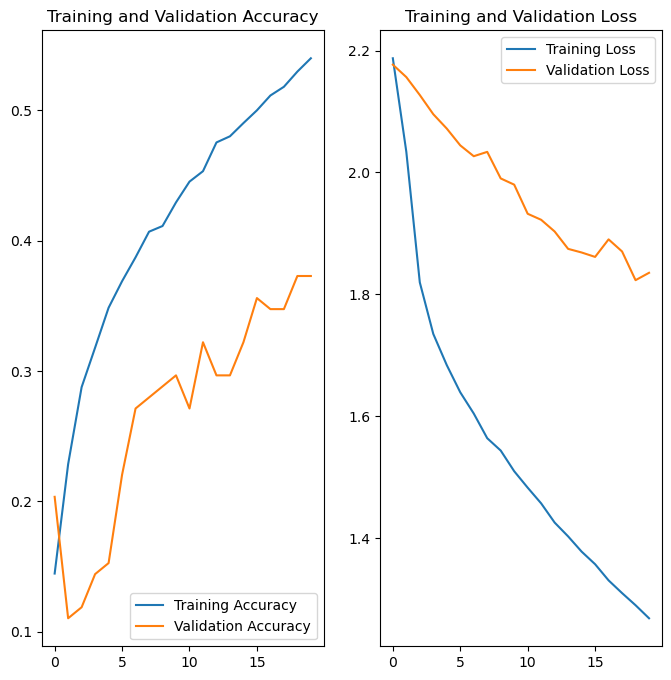

In [24]:
acc = history.history['accuracy']
print(history.history.keys, ":")
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
loss, accuracy = model.evaluate(train_batches, verbose=1,)
loss_v, accuracy_v = model.evaluate(valid_batches, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 82ms/step - accuracy: 0.5377 - loss: 1.3149
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 649ms/step - accuracy: 0.3877 - loss: 1.7805
Accuracy:  0.5445324182510376
Validation Accuracy:  0.37288135290145874
Loss:  1.3122731447219849
Validation Loss 1.8354140520095825


#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

2024-11-19 18:20:38.240468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<Figure size 1000x1000 with 0 Axes>

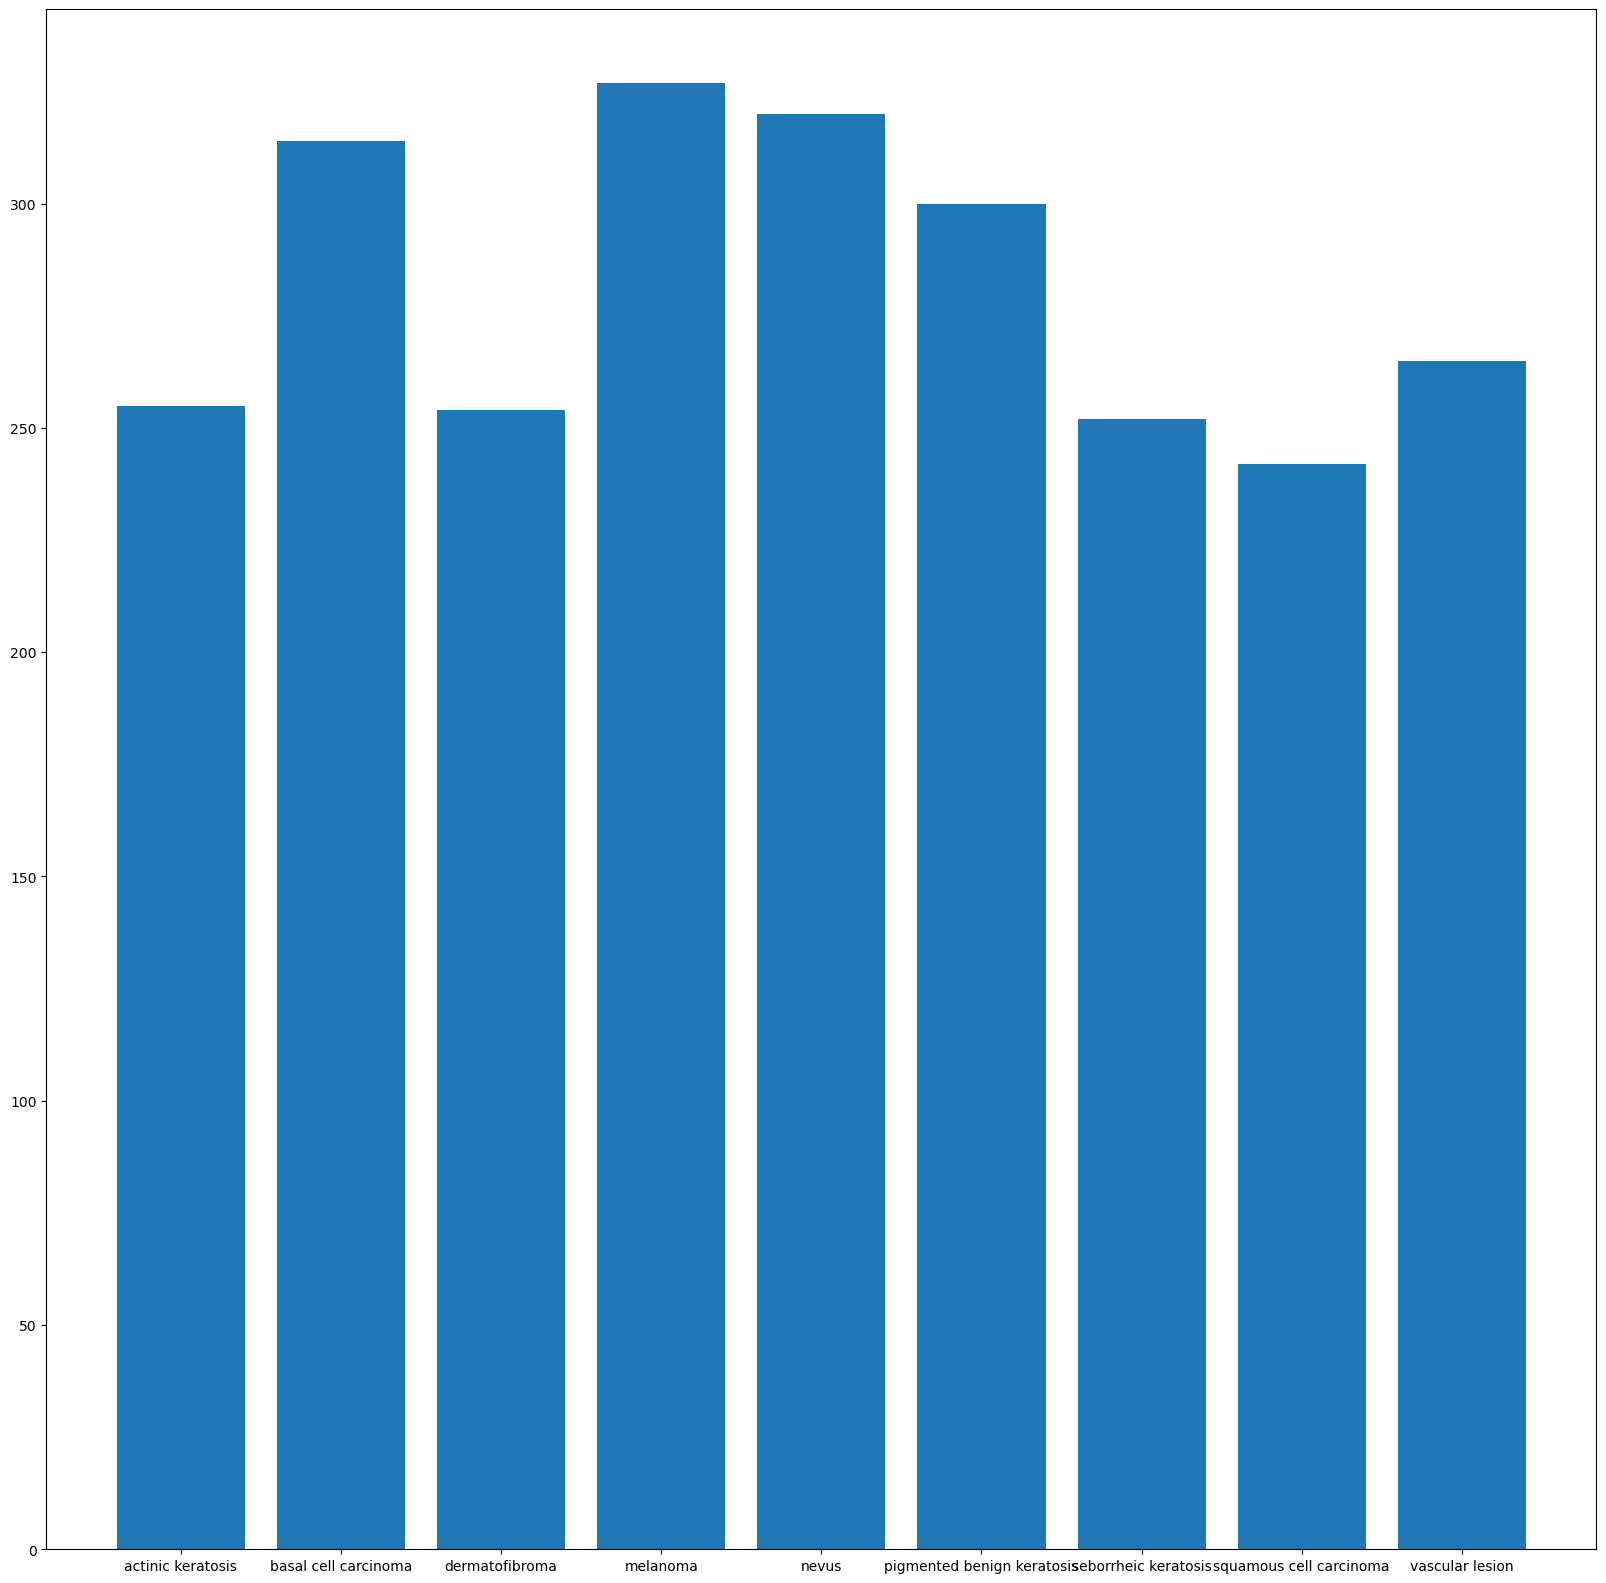

In [26]:
import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

#### Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.


#### - Which class has the least number of samples? - **Actinic Keratosos** and **Seborrheic keratosis**
#### - Which classes dominate the data in terms proportionate number of samples?
**Pigmented benign keratosis** dominates the data of count more than 100 in training


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:

# data_dir_train is a Path object
data_dir_train = pathlib.Path('/Users/rohannaidu/Desktop/Melanoma_Assignment/Train')

# Iterating over class names
for i in class_names:
    # / operator to join paths
    p = data_dir_train / i  # This is the recommended way to join paths in pathlib
    p = str(p)  # Optional: Convert to string if needed
    pipeline = Augmentor.Pipeline(p)
    pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    pipeline.sample(500)  # Add 500 samples per class to avoid sparse classes


Initialised with 114 image(s) found.
Output directory set to /Users/rohannaidu/Desktop/Melanoma_Assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x335F160B0>: 100%|██████████| 500/500 [00:01<00:00, 410.23 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to /Users/rohannaidu/Desktop/Melanoma_Assignment/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x338577AC0>: 100%|██████████| 500/500 [00:01<00:00, 439.31 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /Users/rohannaidu/Desktop/Melanoma_Assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x377D99F90>: 100%|██████████| 500/500 [00:01<00:00, 436.84 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to /Users/rohannaidu/Desktop/Melanoma_Assignment/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x16F94F4F0>: 100%|██████████| 500/500 [00:04<00:00, 111.56 Samples/s]  


Initialised with 357 image(s) found.
Output directory set to /Users/rohannaidu/Desktop/Melanoma_Assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=724x542 at 0x377D73670>: 100%|██████████| 500/500 [00:04<00:00, 104.20 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to /Users/rohannaidu/Desktop/Melanoma_Assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x377D985B0>: 100%|██████████| 500/500 [00:01<00:00, 410.61 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to /Users/rohannaidu/Desktop/Melanoma_Assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x3385A8F10>: 100%|██████████| 500/500 [00:02<00:00, 204.76 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to /Users/rohannaidu/Desktop/Melanoma_Assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x33855D2A0>: 100%|██████████| 500/500 [00:01<00:00, 422.34 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to /Users/rohannaidu/Desktop/Melanoma_Assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x377D98FA0>: 100%|██████████| 500/500 [00:01<00:00, 397.08 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

13500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/Users/rohannaidu/Desktop/Melanoma_Assignment/Train/melanoma/output/melanoma_original_ISIC_0011042.jpg_0df19fe3-efbb-4407-9b8a-c88664e6b097.jpg',
 '/Users/rohannaidu/Desktop/Melanoma_Assignment/Train/melanoma/output/melanoma_original_ISIC_0000550.jpg_665a6b7c-f663-4c55-97cd-02237a2a8bd4.jpg',
 '/Users/rohannaidu/Desktop/Melanoma_Assignment/Train/melanoma/output/melanoma_original_ISIC_0010534.jpg_c7b7c5fe-1aa9-4698-957d-236605f4da40.jpg',
 '/Users/rohannaidu/Desktop/Melanoma_Assignment/Train/melanoma/output/melanoma_original_ISIC_0010644.jpg_6952f192-e37d-4619-872c-e9fef1c58682.jpg',
 '/Users/rohannaidu/Desktop/Melanoma_Assignment/Train/melanoma/output/melanoma_original_ISIC_0000311.jpg_f93804d9-34f1-49b6-975b-fcdb5e046a22.jpg',
 '/Users/rohannaidu/Desktop/Melanoma_Assignment/Train/melanoma/output/melanoma_original_ISIC_0010631.jpg_bd64d69c-8d14-4fc3-98d2-00baa61a84ee.jpg',
 '/Users/rohannaidu/Desktop/Melanoma_Assignment/Train/melanoma/output/melanoma_original_ISIC_0010812.jpg_b059fb5

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [32]:
# Get the first 5 items (key-value pairs)
first_five = list(dataframe_dict_new.items())[:5]

# Print the first 5 items
for key, value in first_five:
    print(f"{key}: {value}")

/Users/rohannaidu/Desktop/Melanoma_Assignment/Train/melanoma/output/melanoma_original_ISIC_0011042.jpg_0df19fe3-efbb-4407-9b8a-c88664e6b097.jpg: melanoma
/Users/rohannaidu/Desktop/Melanoma_Assignment/Train/melanoma/output/melanoma_original_ISIC_0000550.jpg_665a6b7c-f663-4c55-97cd-02237a2a8bd4.jpg: melanoma
/Users/rohannaidu/Desktop/Melanoma_Assignment/Train/melanoma/output/melanoma_original_ISIC_0010534.jpg_c7b7c5fe-1aa9-4698-957d-236605f4da40.jpg: melanoma
/Users/rohannaidu/Desktop/Melanoma_Assignment/Train/melanoma/output/melanoma_original_ISIC_0010644.jpg_6952f192-e37d-4619-872c-e9fef1c58682.jpg: melanoma
/Users/rohannaidu/Desktop/Melanoma_Assignment/Train/melanoma/output/melanoma_original_ISIC_0000311.jpg_f93804d9-34f1-49b6-975b-fcdb5e046a22.jpg: melanoma


In [33]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [34]:
new_df['Label'].value_counts()

Label
melanoma                      1500
pigmented benign keratosis    1500
nevus                         1500
basal cell carcinoma          1500
actinic keratosis             1500
squamous cell carcinoma       1500
vascular lesion               1500
seborrheic keratosis          1500
dermatofibroma                1500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [35]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [36]:
# Define the directory path to your 'Train' folder
data_dir_train = "/Users/rohannaidu/Desktop/Melanoma_Assignment/Train"

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Apply drop_remainder=True after batching
train_ds = train_ds.batch(batch_size, drop_remainder=True)


Found 15739 files belonging to 9 classes.
Using 12592 files for training.


#### Create a validation dataset

In [37]:
# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Apply drop_remainder=True for validation set as well
val_ds = val_ds.batch(batch_size, drop_remainder=True)


Found 15739 files belonging to 9 classes.
Using 3147 files for validation.


In [38]:
# Ensure that you batch the datasets with drop_remainder=False (if you need consistent batch sizes)
train_ds = train_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [39]:
# Loading the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Print out a single batch to verify the shape
for image_batch, label_batch in train_ds.take(1):
    print(f"Image batch shape: {image_batch.shape}")  # Should output (batch_size, 180, 180, 3)
    print(f"Label batch shape: {label_batch.shape}")  # Should output (batch_size,)


Found 15739 files belonging to 9 classes.
Using 12592 files for training.
Found 15739 files belonging to 9 classes.
Using 3147 files for validation.
Image batch shape: (32, 180, 180, 3)
Label batch shape: (32,)


2024-11-19 18:20:59.967666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## 3rd Model: Create your model (make sure to include normalization)

In [40]:
model = Sequential()

# First Conv2D layer should have the correct input shape
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

# Max Pool size of 2*2
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# Adding Dropout Layer
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))  # 9 output classes for multi-class classification

model.summary()


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 180, 180, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 90, 90, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 43, 43, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 43, 43, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 56448)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,225,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,367,465 (28.10 MB)

 Trainable params: 7,366,761 (28.10 MB)

 Non-trainable params: 704 (2.75 KB)

In [41]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [42]:
# Recompile the model
optimizer = Adam(learning_rate=0.001)

model.compile(
    loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
    optimizer=optimizer,
    metrics=['accuracy']
)


In [43]:
epochs = 20  # Define number of epochs
batch_size = 32  # Defined batch size

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    verbose=1,
    callbacks=[learning_rate_reduction]
)


Epoch 1/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 58s 140ms/step - accuracy: 0.3394 - loss: 2.0082 - val_accuracy: 0.4105 - val_loss: 1.6855 - learning_rate: 0.0010
Epoch 2/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 54s 136ms/step - accuracy: 0.5117 - loss: 1.3446 - val_accuracy: 0.3969 - val_loss: 1.8329 - learning_rate: 0.0010
Epoch 3/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 53s 135ms/step - accuracy: 0.5959 - loss: 1.1013 - val_accuracy: 0.4979 - val_loss: 1.4740 - learning_rate: 0.0010
Epoch 4/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 53s 135ms/step - accuracy: 0.6578 - loss: 0.9418 - val_accuracy: 0.6425 - val_loss: 0.9662 - learning_rate: 0.0010
Epoch 5/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 53s 136ms/step - accuracy: 0.7180 - loss: 0.7693 - val_accuracy: 0.2259 - val_loss: 4.8147 - learning_rate: 0.0010
Epoch 6/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 53s 135ms/step - accuracy: 0.7572 - loss: 0.6694 - val_accuracy: 0.8132 - val_loss: 0.5258 - learning_rate: 0.0010
Epoch 7/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 53s 135ms/step - accuracy: 0.7

####  Visualize the model results

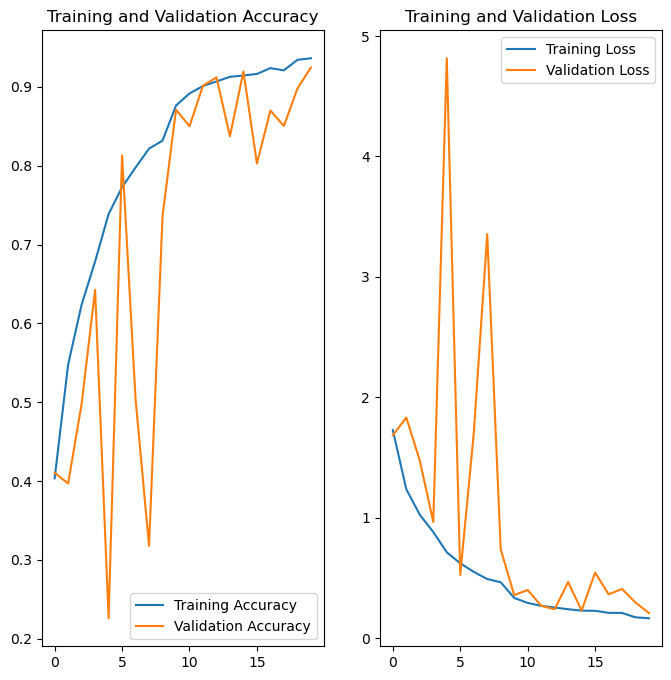

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Did you get rid of underfitting/overfitting? Did class rebalance help?



The class rebalance helped in reducing overfititng of the data and thus the loass is beng reduced
But it reduced the Acurracy very low


Initially we tried without the ImageDataGenerator which created data to over fit at high ratio

Then we introduced dropout and ImageDataGenerator which reduced the over fit

At last we tried Batch Normalization and Augumentation which really helped in carry forward